# Ejercicio 2

## Adquisición de datos

In [57]:
import pandas as pd

dataset = pd.read_csv('data/ta-te-ti.csv')

print(dataset.head())

  V1 V2 V3 V4 V5 V6 V7 V8 V9       V10
0  x  x  x  x  o  o  x  o  o  positive
1  x  x  x  x  o  o  o  x  o  positive
2  x  x  x  x  o  o  o  o  x  positive
3  x  x  x  x  o  o  o  b  b  positive
4  x  x  x  x  o  o  b  o  b  positive


## Pre-procesamiento

### Exploratory Data Analysis

In [58]:
# Busco ceros y faltantes
dataset.info()
# dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      958 non-null    object
 1   V2      958 non-null    object
 2   V3      958 non-null    object
 3   V4      958 non-null    object
 4   V5      958 non-null    object
 5   V6      958 non-null    object
 6   V7      958 non-null    object
 7   V8      958 non-null    object
 8   V9      958 non-null    object
 9   V10     958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


Las columnas V1 a V9 son del tipo String y son datos categóricos. 'x' y 'o' los jugadores, 'b' los casilleros en blanco.

La columna V10, que representa el resultado del juego, también es de tipo String toma los valores categoricos 'positive' y 'negative'

Se puede ver que no hay valores faltantes ni ceros, por lo que podemos pasar a la etapa de transformación

### Transformación de datos. Categorización

In [59]:
# dataset.describe()
# dataset_transformado['Outcome'] = dataset['V10'].apply(lambda x: True if x=='positive' else False)
mapeo_resultados = {'positive': True, 'negative': False}
ds_resultados = dataset['V10'].map(mapeo_resultados)
dataset = dataset.drop(columns=['V10'])

dataset_transformado = pd.DataFrame()
mapeo_categorias = {'b':0, 'x':1, 'o':2}
dataset_transformado = dataset.applymap(lambda x: mapeo_categorias[x])
dataset_transformado

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,1,1,1,1,2,2,1,2,2
1,1,1,1,1,2,2,2,1,2
2,1,1,1,1,2,2,2,2,1
3,1,1,1,1,2,2,2,0,0
4,1,1,1,1,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...
953,2,1,1,1,2,2,2,1,1
954,2,1,2,1,1,2,1,2,1
955,2,1,2,1,2,1,1,2,1
956,2,1,2,2,1,1,1,2,1


In [60]:
import numpy as np

# Agrego la cantidad de movimientos al df

def calcular_movimientos(fila):
    casilleros = fila[[f'V{x}' for x in range(1,10)]].value_counts()
    movimientos = casilleros[1] + casilleros[2]
    return movimientos
    
ds_cuentas = dataset_transformado.copy()
ds_cuentas['resultados'] = ds_resultados
ds_cuentas['movimientos'] = ds_cuentas.apply(calcular_movimientos, axis=1)
ds_cuentas = ds_cuentas.sort_values(by=['movimientos'], ignore_index=True)#.reset_index().drop(columns='index')
ds_cuentas


,V1,V2,V3,V4,V5,V6,V7,V8,V9,resultados,movimientos
0,1,2,0,1,0,0,1,2,0,True,5
1,0,2,0,0,2,0,1,1,1,True,5
2,0,2,0,2,0,0,1,1,1,True,5
3,1,2,2,0,1,0,0,0,1,True,5
4,0,2,0,1,1,1,0,0,2,True,5
...,...,...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,2,1,1,1,1,True,9
954,1,2,2,2,1,2,1,1,1,True,9
955,1,2,2,2,1,1,2,1,1,True,9
956,2,1,2,1,1,2,2,1,1,True,9


In [61]:
# Busco la distribucion por movimientos

for mov in ds_cuentas.movimientos.unique():
    cuenta_resultados = ds_cuentas[ds_cuentas.movimientos == mov]['resultados'].value_counts()
    resultados_positivos = cuenta_resultados[True] if True in cuenta_resultados else 0
    resultados_negativos = cuenta_resultados[False] if False in cuenta_resultados else 0
    print(f'para {mov} jugadas hay {resultados_positivos} resultados positivos y {resultados_negativos} negativos')

para 5 jugadas hay 120 resultados positivos y 0 negativos
para 6 jugadas hay 0 resultados positivos y 148 negativos
para 7 jugadas hay 444 resultados positivos y 0 negativos
para 8 jugadas hay 0 resultados positivos y 168 negativos
para 9 jugadas hay 62 resultados positivos y 16 negativos


In [62]:
# ds_cuentas[ds_cuentas.movimientos == 5]['movimientos'].count()
for valor_unico in ds_cuentas.movimientos.unique():
    ds_aux = ds_cuentas[ds_cuentas.movimientos == valor_unico]
    # cant_tableros = ds_aux['movimientos'].count()
    cant_tableros = ds_aux['movimientos'].value_counts().sum()
    print(f'{cant_tableros} tableros con {valor_unico} movimientos jugados')
    
ds_resultados.value_counts()

120 tableros con 5 movimientos jugados
148 tableros con 6 movimientos jugados
444 tableros con 7 movimientos jugados
168 tableros con 8 movimientos jugados
78 tableros con 9 movimientos jugados


True     626
False    332
Name: V10, dtype: int64

## Modelado y evaluación


### Splitting de datos

In [69]:
from sklearn import model_selection
TEST_SPLIT_01 = 0.3
TEST_SPLIT_02 = 0.1

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(dataset_transformado,
                                                                    ds_resultados,
                                                                    test_size=TEST_SPLIT_01)

### Configuración y entrenamiento del modelo

In [70]:
from sklearn import tree

arbol = tree.DecisionTreeClassifier(criterion='entropy',
                                    max_depth=4)

arbol.fit(X=X_train,y=Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Evaluación del modelo

In [71]:
from sklearn.metrics import confusion_matrix

predicciones = arbol.predict(X_test)
mc = confusion_matrix(y_true=Y_test, y_pred=predicciones)

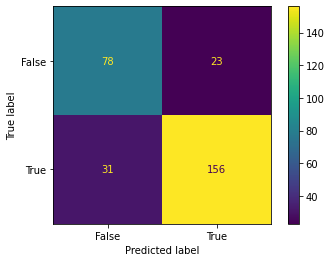

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt

widget_matriz_confusion_segun_media = ConfusionMatrixDisplay(
    confusion_matrix=mc,
    display_labels=arbol.classes_
    )
# widget_matriz_confusion_segun_media.plot(ax=plt.subplot(121), colorbar=False)

widget_matriz_confusion_segun_media.plot()


In [73]:
matrices_confusion = [mc]
parametros_mc = {}

for index, matriz in enumerate(matrices_confusion):
    params = {}
    params['Predicciones correctas'] = matriz[0][0] + matriz [1][1]
    params['Predicciones incorrectas'] = matriz[0][1] + matriz [1][0]
    params['Predicciones totales'] = params['Predicciones correctas'] + params['Predicciones incorrectas']
    params['Predicciones correctas (%)'] = f"{100 * (params['Predicciones correctas'] / params['Predicciones totales']):.2f}"
    params['Predicciones incorrectas (%)'] = f"{100 * (params['Predicciones incorrectas'] / params['Predicciones totales']):.2f}"
    
    parametros_mc[index] = params
    
print(parametros_mc[0])

{'Predicciones correctas': 234, 'Predicciones incorrectas': 54, 'Predicciones totales': 288, 'Predicciones correctas (%)': '81.25', 'Predicciones incorrectas (%)': '18.75'}


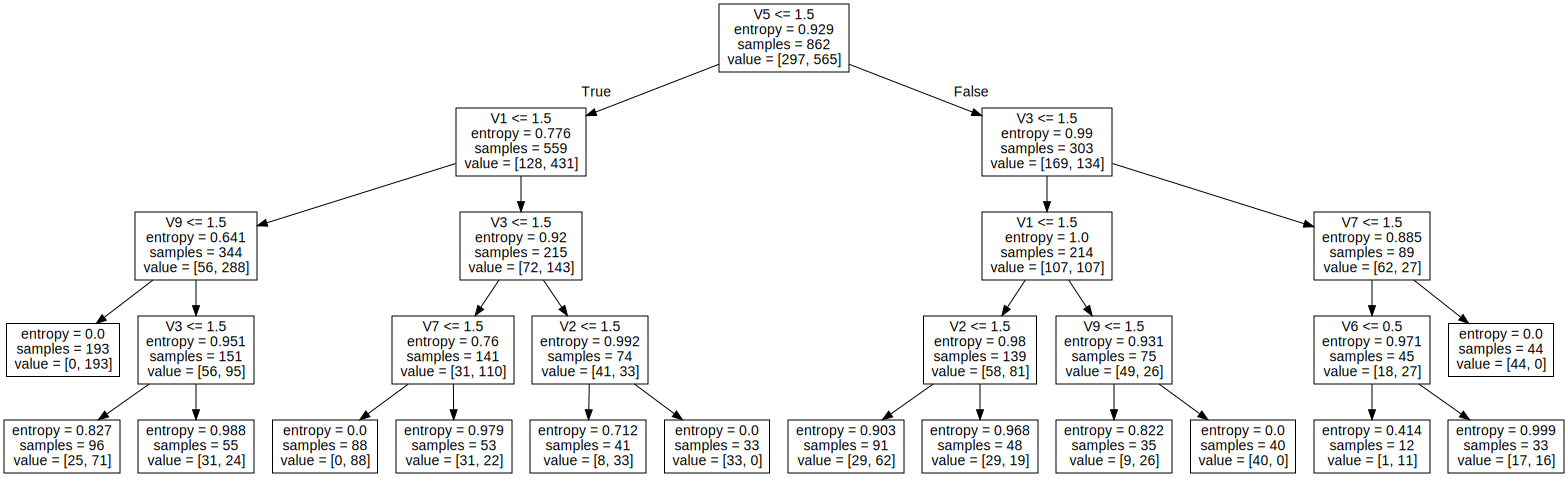

In [68]:
import graphviz

data = tree.export_graphviz(arbol, feature_names=dataset.columns,out_file=None)
graphviz.Source(data)


## Conclusiones

En este caso, la categorización y transformación fueron poco exigentes ya que no había datos cuantitativos y todas las columnas comparten su dominio. 

Para este problema, el overfitting no es indeseado porque no se esperan datos nuevos para clasificar: el dataset es el conjunto de *todos* los resultados posibles con las reglas del ta-te-ti.

Se puede ver de la raíz del arbol que el casillero central (V5) es el que mayor ganancia de información provee.

Se pudo observar que la 'x' tiene casi el doble de posibilidades de ganar que la 'o'.

Se observa también que para los juegos que la 'x' sólo gana en movimientos impares: 5, 7 y 9 (o sea cuando es su turno). 

En particular, si se llega al turno 9 (el últiumo), las 'x' tienen casi el 80% de posibilidades de ganar.

Casi el doble de las partidas terminan en 7 turnos que en otra cantidad.

Para el splitting del 10%, se obtiene el 77% de predicciones correctas. Aumentando a 30% el splitting de testing, se llega al 81%.